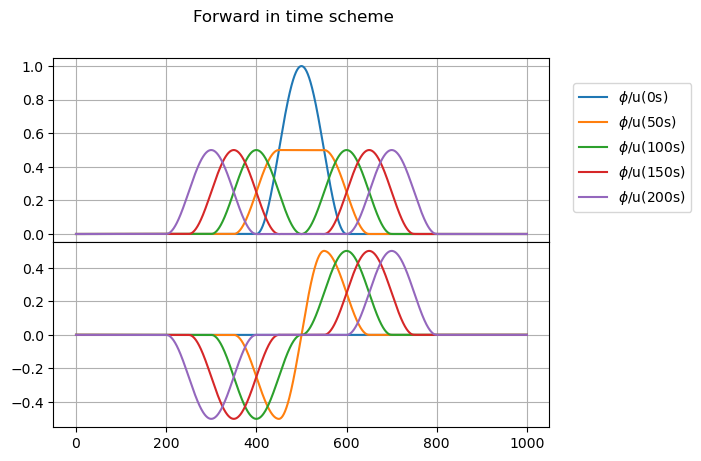

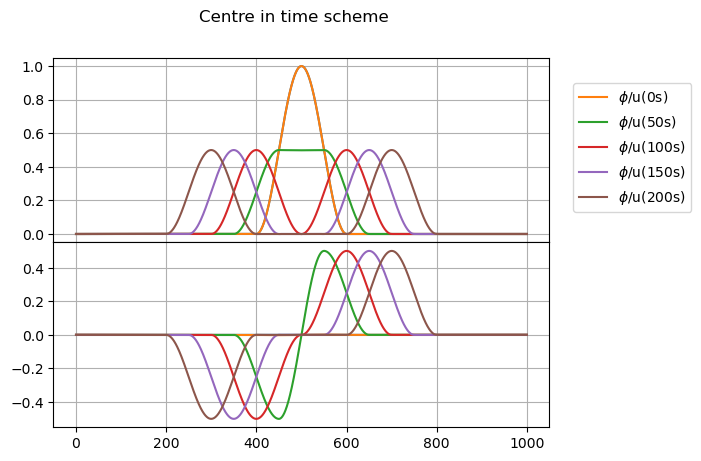

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    if x < 400 or x > 600:
        return 0.
    else:
        return (np.sin((x-400.)/200.*np.pi))**2

def uft(u0, y0):
    return u0 - (np.roll(y0,-1) - np.roll(y0, +1))/(2*dx)*dt 
def pft(u0, y0):
    return y0 - (np.roll(u0,-1) - np.roll(u0, +1))*c/2
def uct(u0, y1):
    return u0 - (np.roll(y1,-1) - np.roll(y1, +1))/dx*dt
def pct(u1, y0):
    return y0 - (np.roll(u1,-1) - np.roll(u1, +1))*c

def ftScheme(x0, y0, u0):
    fig, ax = plt.subplots(2, 1, sharex=True)
    fig.subplots_adjust(hspace=.0)
    t = 0
    while t < duration:
        if t%tinterval < dt:
            ax[0].plot(x0, y0)
            ax[1].plot(x0, u0, label="$\phi$/u(" + str(int(np.floor(t))) + "s)")
        u0 = uft(u0, y0)
        y0 = pft(u0, y0)
        t = t + dt
    fig.suptitle("Forward in time scheme")
    ax[0].grid(); ax[1].grid()
    ax[1].legend(loc="upper right", ncol=1, bbox_to_anchor=(1.3, 1.9))

def ctScheme(x0, y0, u0):
    fig, ax = plt.subplots(2, 1, sharex=True)
    fig.subplots_adjust(hspace=.0)
    t = 0
    ax[0].plot(x0, y0)
    ax[1].plot(x0, u0)
    u1 = uft(u0, y0)
    y1 = pft(u0, y0)
    while t < duration:
        u2 = uct(u0, y1)
        y2 = pct(u1, y0)
        u0 = u1.copy()
        y0 = y1.copy()
        u1 = u2.copy()
        y1 = y2.copy()
        if t%tinterval < dt:
            ax[0].plot(x0, y0)
            ax[1].plot(x0, u0, label="$\phi$/u(" + str(int(np.floor(t))) + "s)")
        t = t + dt
    fig.suptitle("Centre in time scheme")
    ax[0].grid(); ax[1].grid()
    ax[1].legend(loc="upper right", ncol=1, bbox_to_anchor=(1.3, 1.9))
    
# initial condition
dx = 0.5; dt = 0.1 # control vars
P = 1 # phi = gH
c = np.sqrt(P)*dt/dx # auxiliary vars
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)
u0 = np.zeros(len(x0))
tinterval = 50; duration = 200+10
ftScheme(x0, y0, u0)
ctScheme(x0, y0, u0)
